In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")

In [4]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test = pd.read_csv("test.csv")

In [6]:
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [11]:
train.shape,test.shape

((42000, 785), (28000, 784))

In [12]:
X = train.drop('label', axis=1)
y = train['label']

In [13]:
#Standardizing the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [14]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

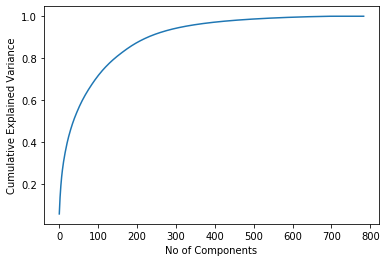

In [15]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [16]:
#Initializing PCA to retain principal components contributing to 95% variance 
pca = PCA(0.95)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
print('Principal Components', pca.n_components_)

Principal Components 320


In [18]:
X = pca.transform(X)

In [19]:
temp_df = pd.DataFrame(data = X[:,0:2],columns = ['Principal Component 1', 'Principal Component 2'])
label_df = pd.DataFrame(data = y,columns = ['label'])
pc_df = pd.concat([temp_df, label_df], axis = 1)

In [20]:
pc_df.head(5)

,Principal Component 1,Principal Component 2,label
0,-5.140478,-5.226445,1
1,19.292332,6.032996,0
2,-7.644503,-1.705813,1
3,-0.474207,5.836139,4
4,26.559574,6.024818,0


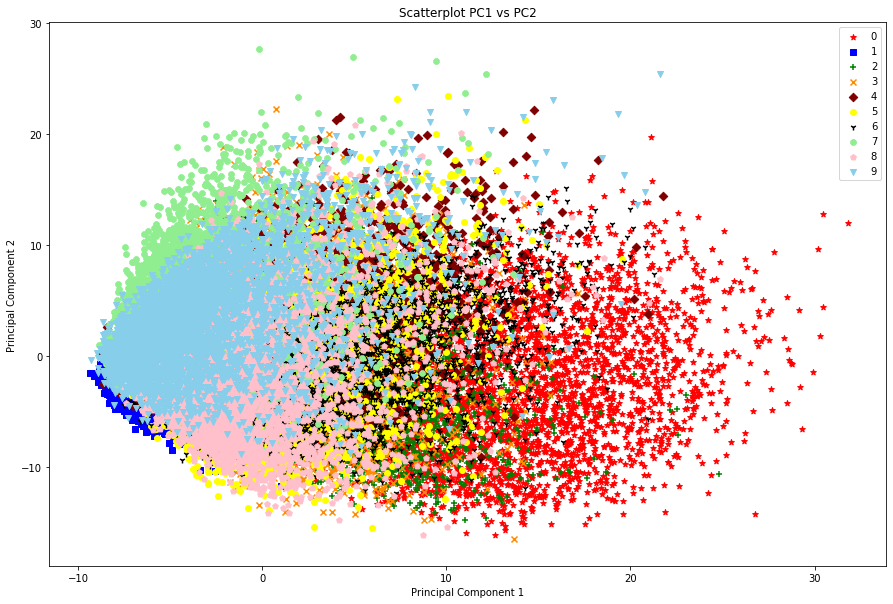

In [21]:
fig = plt.figure(figsize=(15, 10))
colors = ['red', 'blue', 'green', 'darkorange', 'maroon',
          'yellow', 'black', 'lightgreen', 'pink', 'skyblue']
markers = ['*', 's', '+', 'x', 'D', 'o', '1', '8', 'p', 'v']
for label, color, marker in zip(np.unique(y), colors, markers):
    index = (pc_df['label'] == label)
    plt.scatter(pc_df.loc[index, 'Principal Component 1'],
                pc_df.loc[index, 'Principal Component 2'],
                c=color, marker=marker, label=label)
plt.legend(loc='best')
plt.title('Scatterplot PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
fig.savefig('scatterplot_pc1_pc2.png', dpi=fig.dpi)

In [22]:
svclassifier = SVC(kernel='rbf',gamma="scale")

In [23]:
accuracy = cross_val_score(svclassifier, X, y, scoring='accuracy', cv = 10)

In [24]:
print("Accuracy:",round(accuracy.mean() * 100,2))

Accuracy: 96.2


In [25]:
svclassifier.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
test = scaler.transform(test)
test = pca.transform(test)
results = svclassifier.predict(test)

In [29]:
submissions_df=pd.DataFrame({"ImageId": list(range(1,len(results)+1)),
                         "Label": results})
submissions_df.to_csv("Sample_Submission.csv", index=False, header=True)